MODEL CNN

In [1]:
from collections import Counter

import numpy as np
import keras
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt  

import helpers

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 4
epochs = 250
img_rows, img_cols = 48, 48

print('Start loading data.')
files, labels = helpers.load_chars74k_data()
X, y = helpers.create_dataset(files, labels)
print('Data has been loaded.')

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size=0.8)
print(len(x_train))


Start loading data.
Data has been loaded.
92


C:\Users\burhanudinr\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print(len(x_train))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

92
x_train shape: (92, 48, 48, 1)
92 train samples
24 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# train_generator, validation_generator = helpers.create_datagenerator(x_train, x_test, y_train, y_test)

# Convolutional network will be build with Keras.
print('Start training the model.')
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),strides=(2, 2), activation='relu', input_shape=input_shape,name='Konvolusi_ke-1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='Maxpool_ke-1'))

model.add(Conv2D(64, (3, 3), border_mode='same', activation='relu',name='Konvolusi_ke-2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='Maxpool_ke-2'))

model.add(Conv2D(128, (3, 3), border_mode='same', activation='relu',name='Konvolusi_ke-3'))
model.add(MaxPooling2D(pool_size=(2, 2),name='Maxpool_ke-3'))
model.add(Dropout(0.25,name='Dropput_25'))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.5,name='Dropput_5'))
model.add(Dense(64, activation='relu',name='Dense_ke-1'))
model.add(Dense(num_classes, activation='softmax',name='Output_Layer'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Start training the model.

C:\Users\burhanudinr\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", name="Konvolusi_ke-2", activation="relu")`
  
C:\Users\burhanudinr\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", name="Konvolusi_ke-3", activation="relu")`



Train on 92 samples, validate on 24 samples
Epoch 1/250
92/92 [==============================] - 0s 3ms/step - loss: 11.1919 - acc: 0.2065 - val_loss: 6.9284 - val_acc: 0.1667
Epoch 2/250
92/92 [==============================] - 0s 1ms/step - loss: 8.5342 - acc: 0.3261 - val_loss: 8.6119 - val_acc: 0.2500
Epoch 3/250
92/92 [==============================] - 0s 2ms/step - loss: 8.6570 - acc: 0.3587 - val_loss: 12.7602 - val_acc: 0.2083
Epoch 4/250
92/92 [==============================] - 0s 2ms/step - loss: 10.9113 - acc: 0.2391 - val_loss: 7.0041 - val_acc: 0.2917
Epoch 5/250
92/92 [==============================] - 0s 2ms/step - loss: 9.0774 - acc: 0.2609 - val_loss: 8.4585 - val_acc: 0.2083
Epoch 6/250
92/92 [==============================] - 0s 2ms/step - loss: 8.6888 - acc: 0.2283 - val_loss: 12.3370 - val_acc: 0.2083
Epoch 7/250
92/92 [==============================] - 0s 2ms/step - loss: 8.7232 - acc: 0.2826 - val_loss: 3.9852 - val_acc: 0.2917
Epoch 8/250
92/92 [===============

Epoch 63/250
92/92 [==============================] - 0s 1ms/step - loss: 0.3935 - acc: 0.8478 - val_loss: 0.8759 - val_acc: 0.6250
Epoch 64/250
92/92 [==============================] - 0s 1ms/step - loss: 0.3501 - acc: 0.9022 - val_loss: 1.1718 - val_acc: 0.6667
Epoch 65/250
92/92 [==============================] - 0s 1ms/step - loss: 0.3762 - acc: 0.8587 - val_loss: 0.9636 - val_acc: 0.7500
Epoch 66/250
92/92 [==============================] - 0s 1ms/step - loss: 0.2843 - acc: 0.9239 - val_loss: 1.2037 - val_acc: 0.6250
Epoch 67/250
92/92 [==============================] - 0s 1ms/step - loss: 0.3468 - acc: 0.8804 - val_loss: 1.2069 - val_acc: 0.7083
Epoch 68/250
92/92 [==============================] - 0s 1ms/step - loss: 0.4081 - acc: 0.8696 - val_loss: 1.2536 - val_acc: 0.5417
Epoch 69/250
92/92 [==============================] - 0s 1ms/step - loss: 0.3471 - acc: 0.8587 - val_loss: 1.0219 - val_acc: 0.7083
Epoch 70/250
92/92 [==============================] - 0s 1ms/step - loss: 0.

Epoch 125/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0418 - acc: 0.9891 - val_loss: 1.2568 - val_acc: 0.7083
Epoch 126/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0243 - acc: 0.9891 - val_loss: 1.2538 - val_acc: 0.7500
Epoch 127/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0441 - acc: 0.9891 - val_loss: 1.2804 - val_acc: 0.7500
Epoch 128/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0255 - acc: 1.0000 - val_loss: 1.3584 - val_acc: 0.7500
Epoch 129/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0281 - acc: 0.9891 - val_loss: 1.3449 - val_acc: 0.7500
Epoch 130/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0254 - acc: 1.0000 - val_loss: 1.3742 - val_acc: 0.7500
Epoch 131/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0673 - acc: 0.9891 - val_loss: 1.5556 - val_acc: 0.6250
Epoch 132/250
92/92 [==============================] - 0s 1ms/step - 

Epoch 187/250
92/92 [==============================] - 0s 3ms/step - loss: 0.0148 - acc: 1.0000 - val_loss: 1.5652 - val_acc: 0.6667
Epoch 188/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0094 - acc: 1.0000 - val_loss: 1.6350 - val_acc: 0.7083
Epoch 189/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0146 - acc: 1.0000 - val_loss: 1.5203 - val_acc: 0.6667
Epoch 190/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0123 - acc: 1.0000 - val_loss: 1.6157 - val_acc: 0.7500
Epoch 191/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0169 - acc: 0.9891 - val_loss: 1.6733 - val_acc: 0.7500
Epoch 192/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0155 - acc: 1.0000 - val_loss: 1.7256 - val_acc: 0.7083
Epoch 193/250
92/92 [==============================] - 0s 2ms/step - loss: 0.0073 - acc: 1.0000 - val_loss: 1.6887 - val_acc: 0.7500
Epoch 194/250
92/92 [==============================] - 0s 2ms/step - 

Epoch 249/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 1.4419 - val_acc: 0.7083
Epoch 250/250
92/92 [==============================] - 0s 1ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 1.4646 - val_acc: 0.7083


dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])


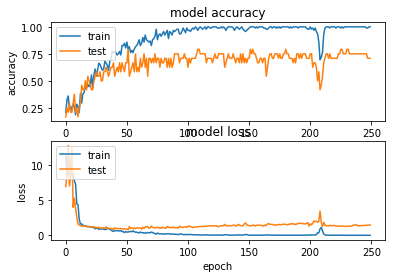

Model has been trained.
Test loss: 1.46461486816
Test accuracy:  70.8333313465


In [5]:
print(history.history.keys())  

plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  
 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

# Calculate loss and accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print('Model has been trained.')
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0)

In [6]:
# def plot_filters(layer, x, y):
#     filters = layer.W.get_value()
#     fig = plt.figure(figsize=(8, 4))
#     for j in range(len(filters)):
#         ax = fig.add_subplot(y, x, j+1)
#         ax.matshow(filters[j][0], cmap = matplotlib.cm.Blues)
#         plt.xticks(np.array([]))
#         plt.yticks(np.array([]))
#     plt.tight_layout()
#     return plt

# plot_filters(model.layers[0], 8, 4)

In [7]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t\t\t", layer.output_shape)
    

Layer 0 	 Konvolusi_ke-1 		 (None, 48, 48, 1) 			 (None, 23, 23, 32)
Layer 1 	 Maxpool_ke-1 		 (None, 23, 23, 32) 			 (None, 11, 11, 32)
Layer 2 	 Konvolusi_ke-2 		 (None, 11, 11, 32) 			 (None, 11, 11, 64)
Layer 3 	 Maxpool_ke-2 		 (None, 11, 11, 64) 			 (None, 5, 5, 64)
Layer 4 	 Konvolusi_ke-3 		 (None, 5, 5, 64) 			 (None, 5, 5, 128)
Layer 5 	 Maxpool_ke-3 		 (None, 5, 5, 128) 			 (None, 2, 2, 128)
Layer 6 	 Dropput_25 		 (None, 2, 2, 128) 			 (None, 2, 2, 128)
Layer 7 	 flatten_1 		 (None, 2, 2, 128) 			 (None, 512)
Layer 8 	 Dropput_5 		 (None, 512) 			 (None, 512)
Layer 9 	 Dense_ke-1 		 (None, 512) 			 (None, 64)
Layer 10 	 Output_Layer 		 (None, 64) 			 (None, 4)


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Konvolusi_ke-1 (Conv2D)      (None, 23, 23, 32)        320       
_________________________________________________________________
Maxpool_ke-1 (MaxPooling2D)  (None, 11, 11, 32)        0         
_________________________________________________________________
Konvolusi_ke-2 (Conv2D)      (None, 11, 11, 64)        18496     
_________________________________________________________________
Maxpool_ke-2 (MaxPooling2D)  (None, 5, 5, 64)          0         
_________________________________________________________________
Konvolusi_ke-3 (Conv2D)      (None, 5, 5, 128)         73856     
_________________________________________________________________
Maxpool_ke-3 (MaxPooling2D)  (None, 2, 2, 128)         0         
_________________________________________________________________
Dropput_25 (Dropout)         (None, 2, 2, 128)         0         
__________

In [9]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

namaModel = "model.h5"
model.save_weights(namaModel)
print("Model : " + namaModel + " telah disimpan")

Model : model.h5 telah disimpan


24
24
[[4 1 0 2]
 [0 5 1 1]
 [1 0 3 1]
 [0 0 0 5]]


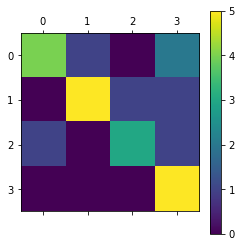

In [10]:
import brewer2mpl
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score


y_prob = model.predict(x_test, batch_size=batch_size, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

print(len(y_true))
print(len(y_pred))

set3 = brewer2mpl.get_map('Set3', 'qualitative', 4).mpl_colors
%matplotlib inline

cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.matshow(cm)
plt.colorbar()

92
92
[[20  0  0  0]
 [ 0 21  0  0]
 [ 0  0 27  0]
 [ 0  0  0 24]]


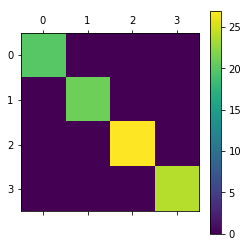

In [11]:
import brewer2mpl

y_prob = model.predict(x_train, batch_size=batch_size, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_train]

print(len(y_true))
print(len(y_pred))

set3 = brewer2mpl.get_map('Set3', 'qualitative', 4).mpl_colors
%matplotlib inline

cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.matshow(cm)
plt.colorbar()